A1




In [24]:
import numpy as np
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

def step(x):
  return 1 if x >= 0 else 0

def bipolar_step(x):
  return 1 if x >= 0 else -1

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return np.tanh(x)

def relu(x):
  return max(0, x)

def leaky_relu(x):
  return x if x > 0 else 0.01 * x

def comparator(output, target):
  return target - output

x = np.array([1, 0])
w = np.array([0.2, -0.75])
print("Summation:", summation_unit(x, w))
print("Step:", step(0.1))
print("Bi-Polar Step:", bipolar_step(-0.5))
print("Sigmoid:", sigmoid(0.5))
print("Tanh:", tanh(0.5))
print("ReLU:", relu(-1))
print("Leaky ReLU:", leaky_relu(-1))
print("Comparator:", comparator(1, 0))

Summation: 0.2
Step: 1
Bi-Polar Step: -1
Sigmoid: 0.6224593312018546
Tanh: 0.46211715726000974
ReLU: 0
Leaky ReLU: -0.01
Comparator: -1


A2

Final weights: [-0.1   0.1   0.05]
Epochs taken: 130


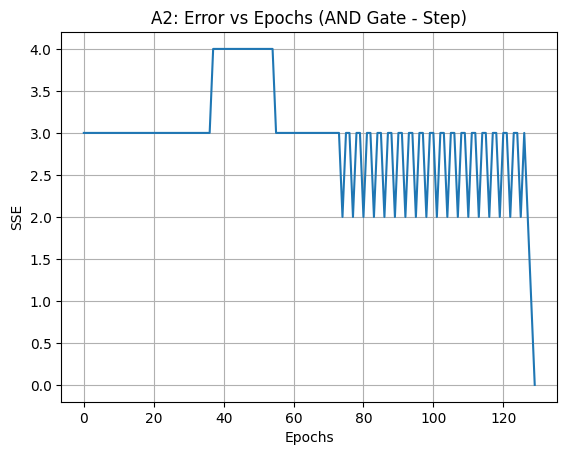

----------------------------------------


In [25]:
def perceptron_train(data, targets, weights, lr, activation_fn, max_epochs=1000, threshold=0.002):
    error_list = []
    for epoch in range(max_epochs):
        total_error = 0
        for x, target in zip(data, targets):
            x_aug = np.insert(x, 0, 1)
            summation = summation_unit(x_aug, weights)
            output = activation_fn(summation)
            error = comparator(output, target)
            weights += lr * error * x_aug
            total_error += error ** 2
        error_list.append(total_error)
        if total_error <= threshold:
            break
    return weights, epoch + 1, error_list

AND_data = np.array([[0,0],[0,1],[1,0],[1,1]])
AND_targets = np.array([0,0,0,1])
initial_weights = np.array([10, 0.2, -0.75])
lr = 0.05

final_weights, epochs, error_list = perceptron_train(AND_data, AND_targets, initial_weights.copy(), lr, step)
print("Final weights:", final_weights)
print("Epochs taken:", epochs)

plt.plot(error_list)
plt.title("A2: Error vs Epochs (AND Gate - Step)")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.grid(True)
plt.show()
print("-" * 40)

A3


In [26]:
activations = {
    "Bi-Polar Step": bipolar_step,
    "Sigmoid": sigmoid,
    "ReLU": relu
}
for name, fn in activations.items():
    _, ep, _ = perceptron_train(AND_data, AND_targets, initial_weights.copy(), lr, fn)
    print(f"{name} converged in {ep} epochs")
print("-" * 40)

Bi-Polar Step converged in 1000 epochs
Sigmoid converged in 1000 epochs
ReLU converged in 390 epochs
----------------------------------------


A4

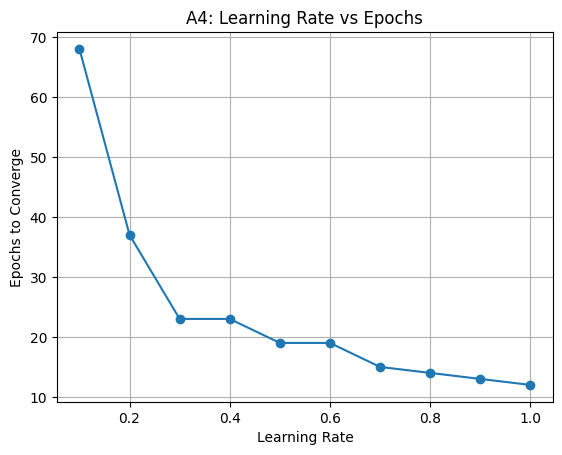

In [27]:
def vary_learning_rate(data, targets, initial_weights, activation_fn):
    rates = [i / 10 for i in range(1, 11)]
    iterations_needed = []
    for rate in rates:
        weights = initial_weights.copy()
        _, epochs, _ = perceptron_train(data, targets, weights, rate, activation_fn)
        iterations_needed.append(epochs)
    plt.plot(rates, iterations_needed, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Epochs to Converge')
    plt.title('A4: Learning Rate vs Epochs')
    plt.grid(True)
    plt.show()

vary_learning_rate(AND_data, AND_targets, initial_weights.copy(), step)


A5

In [28]:
XOR_targets = np.array([0,1,1,0])
for name, fn in activations.items():
    _, ep, _ = perceptron_train(AND_data, XOR_targets, initial_weights.copy(), lr, fn)
    print(name,"converged in",ep,"epochs")

Bi-Polar Step converged in 1000 epochs
Sigmoid converged in 1000 epochs
ReLU converged in 1000 epochs


A6

In [29]:
def sigmoid_perceptron(data, targets, weights, lr, max_epochs=1000, threshold=0.002):
    for epoch in range(max_epochs):
        total_error = 0
        for x, target in zip(data, targets):
            x_aug = np.insert(x, 0, 1)
            summation = summation_unit(x_aug, weights)
            output = sigmoid(summation)
            error = target - output
            weights += lr * error * x_aug
            total_error += error**2
        if total_error <= threshold:
            break
    return weights

cust_data = np.array([
    [20,6,2], [16,3,6], [27,6,2], [19,1,2], [24,4,2],
    [22,1,5], [15,4,2], [18,4,2], [21,1,4], [16,2,4]
])
cust_targets = np.array([1,1,1,0,1,0,1,1,0,0])
cust_weights = np.random.rand(4)

trained_weights = sigmoid_perceptron(cust_data, cust_targets, cust_weights, 0.05)
print("Trained Weights:", trained_weights)

Trained Weights: [ 0.10091534 -1.37428778  9.16497202 -0.04974671]


A7

In [30]:
def pseudo_inverse_solution(data, targets):
    X = np.hstack([np.ones((len(data), 1)), data])
    return np.dot(np.linalg.pinv(X), targets)

pseudo_weights = pseudo_inverse_solution(cust_data, cust_targets)
print("Pseudo-inverse Weights:", pseudo_weights)

Pseudo-inverse Weights: [ 0.1139903  -0.02342675  0.2607237   0.03727212]


A8

In [31]:
def train_simple_nn_AND(lr=0.05, max_epochs=1000, threshold=0.002):
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([[0], [0], [0], [1]])

    np.random.seed(0)
    W1 = np.random.randn(2, 2)
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1)
    b2 = np.zeros((1, 1))

    for epoch in range(max_epochs):
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        error = y - a2
        loss = np.mean(error ** 2)
        if loss < threshold:
            break
        d2 = error * a2 * (1 - a2)
        d1 = np.dot(d2, W2.T) * a1 * (1 - a1)
        W2 += lr * np.dot(a1.T, d2)
        b2 += lr * np.sum(d2, axis=0, keepdims=True)
        W1 += lr * np.dot(X.T, d1)
        b1 += lr * np.sum(d1, axis=0, keepdims=True)
    return epoch + 1

epochs_taken = train_simple_nn_AND()
print("Converged in:", epochs_taken, "epochs")

Converged in: 1000 epochs


A9

In [32]:
final_weights, epochs, _ = perceptron_train(AND_data, XOR_targets, initial_weights.copy(), lr, step)
print("Epochs taken:", epochs)
print("Final weights:", final_weights)

Epochs taken: 1000
Final weights: [ 0.1 -0.1 -0.1]


A10

In [33]:
def logic_two_output(data, targets, weights, lr, activation_fn):
    target_map = {0: [1, 0], 1: [0, 1]}
    Y = np.array([target_map[t] for t in targets])
    for epoch in range(1000):
        total_error = 0
        for x, target in zip(data, Y):
            x_aug = np.insert(x, 0, 1)
            for i in range(2):
                summ = summation_unit(x_aug, weights[i])
                out = activation_fn(summ)
                err = target[i] - out
                weights[i] += lr * err * x_aug
                total_error += err ** 2
        if total_error <= 0.002:
            break
    return weights

weights_dual = [initial_weights.copy(), initial_weights.copy()]
weights_dual = logic_two_output(AND_data, AND_targets, weights_dual, lr, step)
print("Dual Output Weights:", weights_dual)

Dual Output Weights: [array([ 6.85, -2.95, -3.9 ]), array([-0.1 ,  0.1 ,  0.05])]


A11

In [34]:
from sklearn.neural_network import MLPClassifier

# AND Gate 
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# XOR Gate 
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=1000, random_state=1)
mlp_and.fit(X_and, y_and)
print("AND Gate Predictions:", mlp_and.predict(X_and))
print("AND Gate Accuracy:", mlp_and.score(X_and, y_and))

mlp_xor = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000, random_state=1)
mlp_xor.fit(X_xor, y_xor)
print("XOR Gate Predictions:", mlp_xor.predict(X_xor))
print("XOR Gate Accuracy:", mlp_xor.score(X_xor, y_xor))


AND Gate Predictions: [0 0 0 1]
AND Gate Accuracy: 1.0
XOR Gate Predictions: [0 0 1 1]
XOR Gate Accuracy: 0.5


A12

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

csv_file = "face_data_multi.csv" 
data = np.genfromtxt(csv_file, delimiter=',', skip_header=1)

X = data[:, 1:]  # Pixel values
y = data[:, 0]   # Emotion labels

print("Dataset loaded successfully!")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='adam',
                    learning_rate_init=0.001,
                    max_iter=500,
                    random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("MLPClassifier Accuracy:", accuracy)

Dataset loaded successfully!
Number of samples: 26217
Number of features: 2304
MLPClassifier Accuracy: 0.3422959572845156
